<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

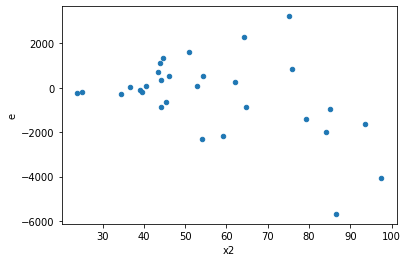

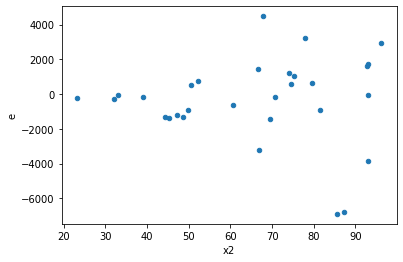

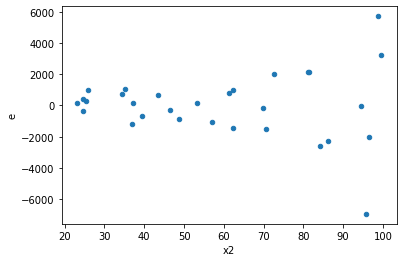

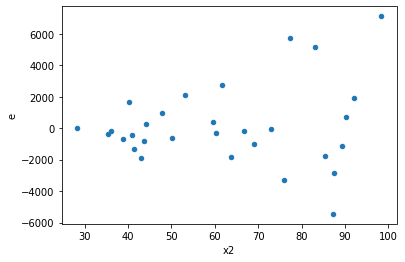

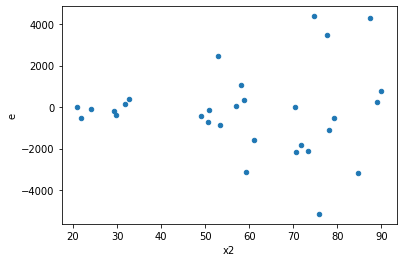

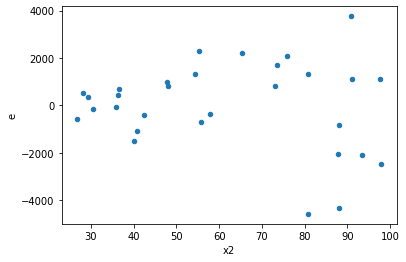

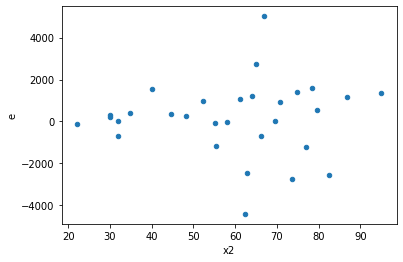

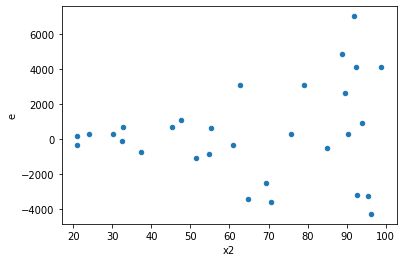

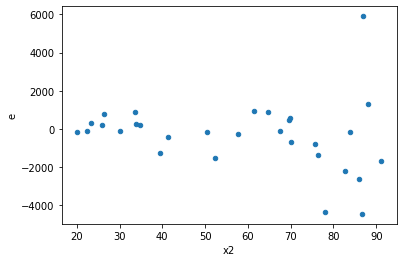

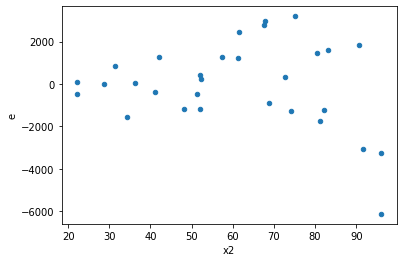

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,43997692.88188465,2758103.0475933407,5499711.610235581,344762.8809491676,15.952157016133263,0.00032772722395790765,0.999836136388021,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,101171688.1265864,5527062.920928091,12646461.0158233,690882.8651160114,18.304783132376194,0.00018657680531553034,0.9999067115973422,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,121494743.16384995,2866290.804904386,15186842.895481244,358286.35061304824,42.38744476169884,5.308812792037543e-06,0.999997345593604,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,108052138.05354401,6723286.360555022,13506517.256693002,840410.7950693778,16.071327660156967,0.00031794907921178783,0.9998410254603941,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,79576702.10863093,6174435.316172043,9947087.763578866,771804.4145215054,12.888093895842445,0.0007728920218985635,0.9996135539890507,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,59230909.82429083,6104787.502108288,7403863.728036353,763098.437763536,9.7023704434979,0.002338578558209292,0.9988307107208954,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,24458928.601830423,2757397.77507272,3057366.075228803,344674.72188409,8.870293877416863,0.0032852537700600593,0.99835737311497,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,128689279.73265587,3775197.6419859393,16086159.966581983,471899.7052482424,34.088090727074885,1.3583260924709961e-05,0.9999932083695376,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,62671326.60465101,3120466.142230783,7833915.825581376,390058.2677788479,20.08396301965579,0.00012711873640669502,0.9999364406317967,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,43997692.88188465,2758103.0475933407,5499711.610235581,344762.8809491676,15.952157016133263,0.00032772722395790765,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,101171688.1265864,5527062.920928091,12646461.0158233,690882.8651160114,18.304783132376194,0.00018657680531553034,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,121494743.16384995,2866290.804904386,15186842.895481244,358286.35061304824,42.38744476169884,5.308812792037543e-06,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,108052138.05354401,6723286.360555022,13506517.256693002,840410.7950693778,16.071327660156967,0.00031794907921178783,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,79576702.10863093,6174435.316172043,9947087.763578866,771804.4145215054,12.888093895842445,0.0007728920218985635,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,59230909.82429083,6104787.502108288,7403863.728036353,763098.437763536,9.7023704434979,0.002338578558209292,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,24458928.601830423,2757397.77507272,3057366.075228803,344674.72188409,8.870293877416863,0.0032852537700600593,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,128689279.73265587,3775197.6419859393,16086159.966581983,471899.7052482424,34.088090727074885,1.3583260924709961e-05,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,62671326.60465101,3120466.142230783,7833915.825581376,390058.2677788479,20.08396301965579,0.00012711873640669502,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    836
Reject001=1 : Homoscedasticity      164
Name: Result_test, dtype: int64